<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


⭐Run the following code to read in the "cardio.csv" file.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/cardio.csv", sep=";")

In [ ]:
#df = pd.read_csv("cardio.csv", sep=";")

In [4]:
df=df.sample(500, random_state=42)

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,66728,21770,1,156,64.0,140,80,2,1,0,0,1,1
48393,69098,21876,1,170,85.0,160,90,1,1,0,0,1,1
41416,59185,23270,1,151,90.0,130,80,1,1,0,0,1,1
34506,49288,19741,1,159,97.0,120,80,1,1,0,0,1,1
43725,62481,18395,1,164,68.0,120,80,1,1,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 46730 to 42173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 54.7 KB


In [8]:
df.shape

(500, 13)

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,49656.324000,19460.940000,1.368000,164.746000,74.093400,127.91200,98.908000,1.338000,1.192000,0.07800,0.046000,0.762000,0.492000
std,27694.652229,2444.264657,0.482744,8.017609,14.340822,40.82349,130.985839,0.651617,0.540111,0.26844,0.209695,0.426286,0.500437
min,172.000000,14319.000000,1.000000,144.000000,43.000000,-120.00000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,26990.500000,17804.000000,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,49225.500000,19669.000000,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
75%,72126.500000,21326.250000,2.000000,170.000000,80.000000,140.00000,90.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,99934.000000,23670.000000,2.000000,198.000000,160.000000,907.00000,1200.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [10]:
df.set_index(['id'], inplace=True)

In [11]:
df["age"] = np.round(df.age/365,2)
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
66728,59.64,1,156,64.0,140,80,2,1,0,0,1,1
69098,59.93,1,170,85.0,160,90,1,1,0,0,1,1
59185,63.75,1,151,90.0,130,80,1,1,0,0,1,1


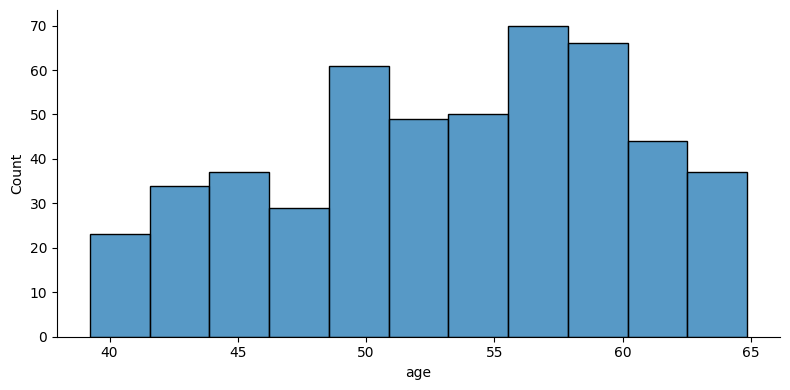

In [13]:
 sns.displot(x="age", height = 4, aspect = 2, data=df);

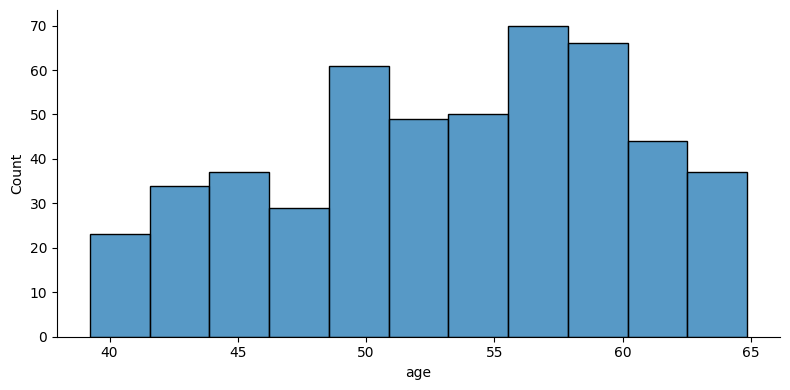

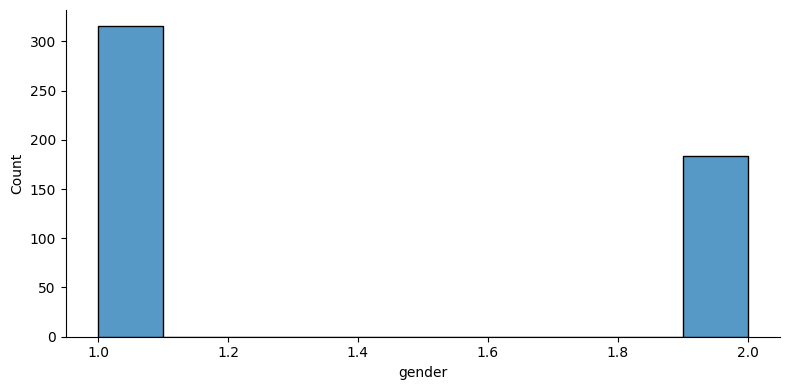

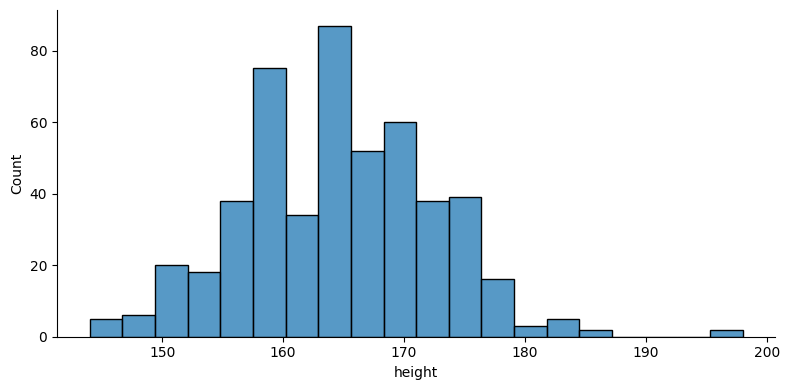

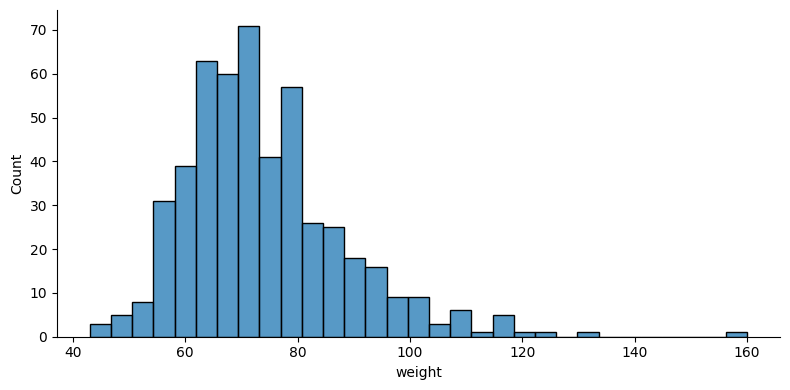

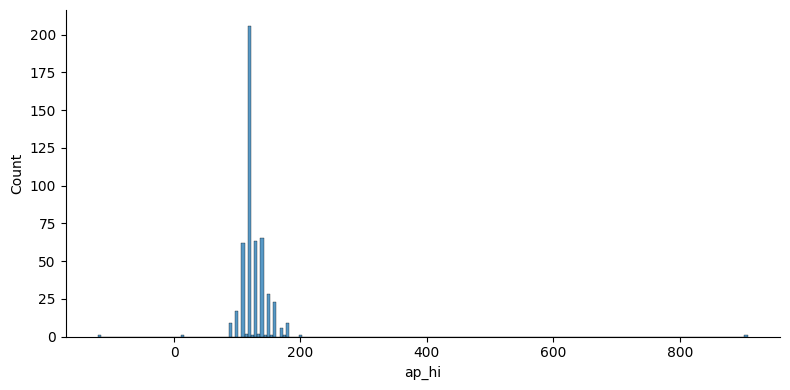

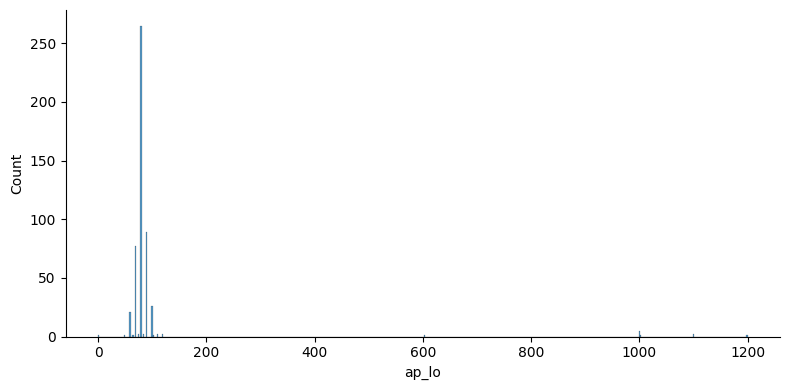

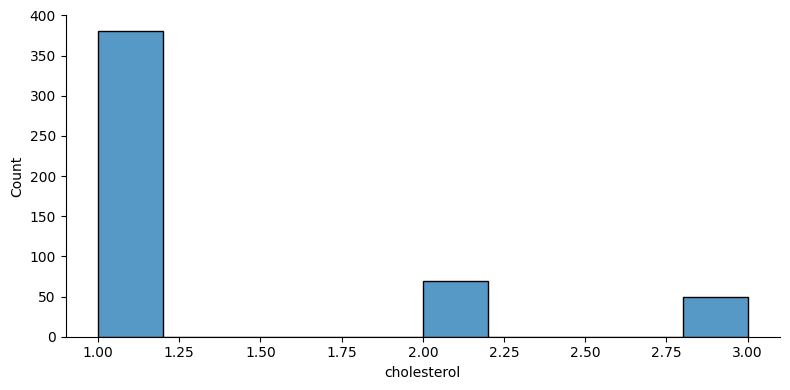

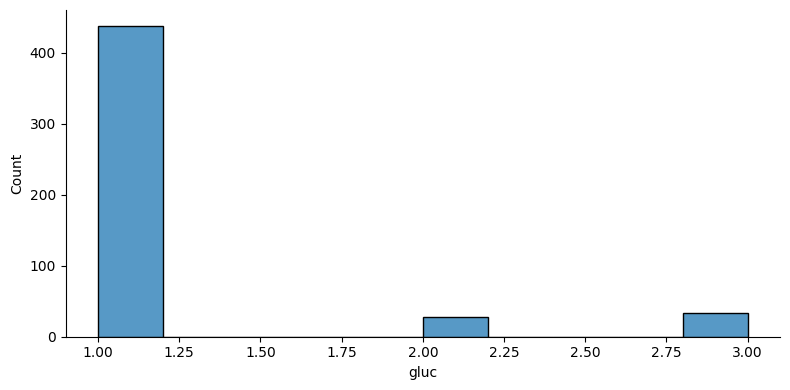

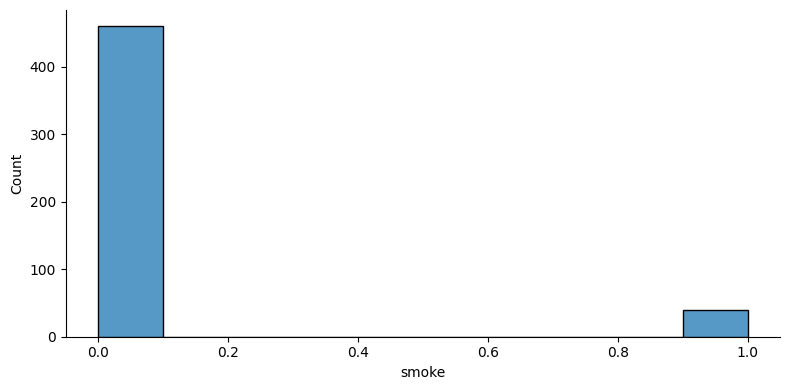

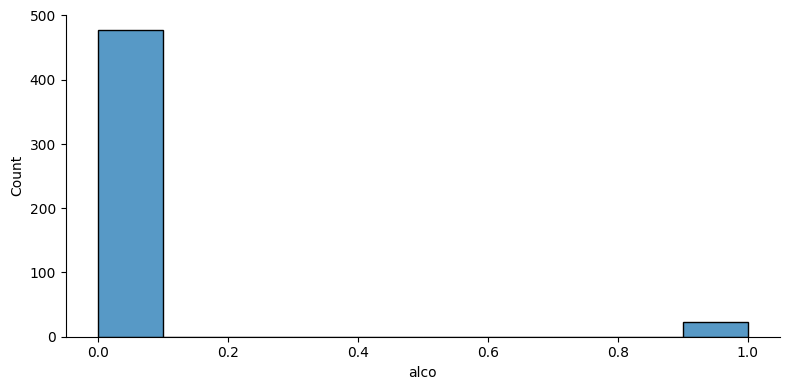

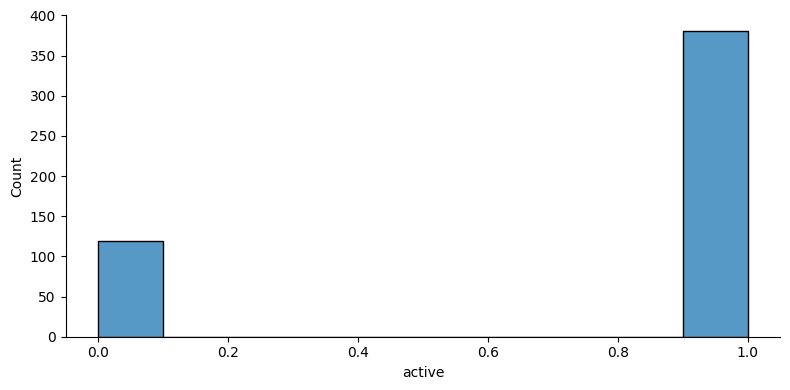

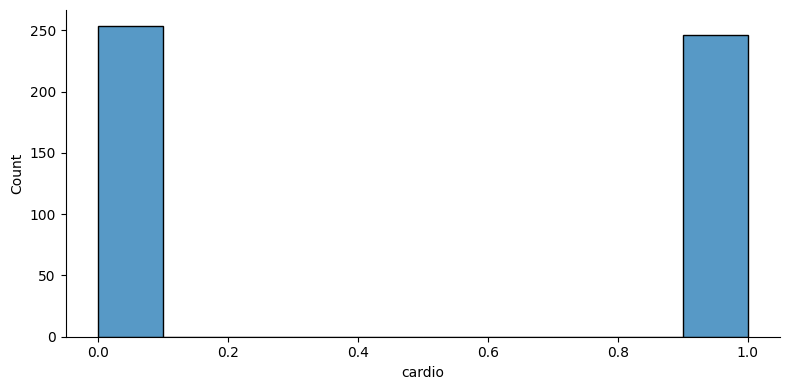

In [14]:
for col in df.columns:
  sns.displot(x=col, height = 4, aspect = 2, data=df)

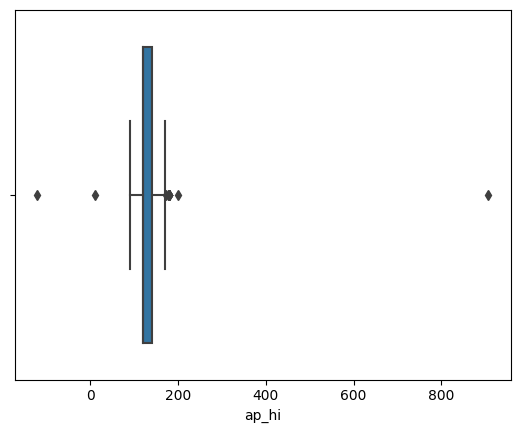

In [16]:
sns.boxplot(x="ap_hi", data=df);

In [17]:
df = df[df['ap_hi'] < 300 ]
df = df[df['ap_hi'] > 25 ]

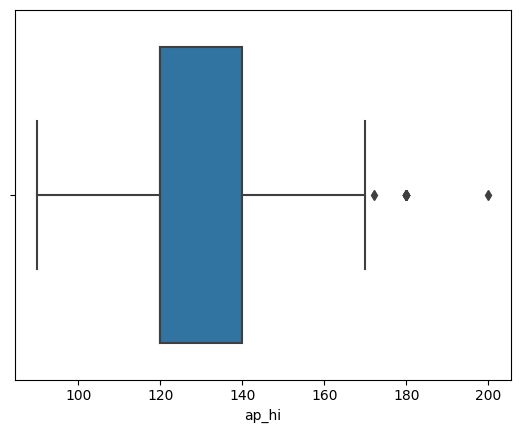

In [18]:
sns.boxplot(x="ap_hi", data=df);

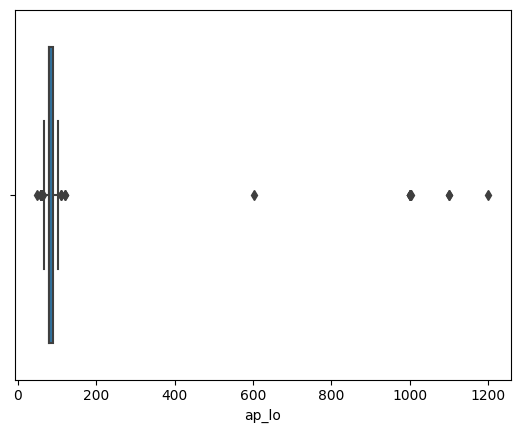

In [19]:
sns.boxplot(x="ap_lo", data=df);

In [20]:
df = df[df['ap_lo'] < 250 ]
df = df[df['ap_lo'] > 0 ]

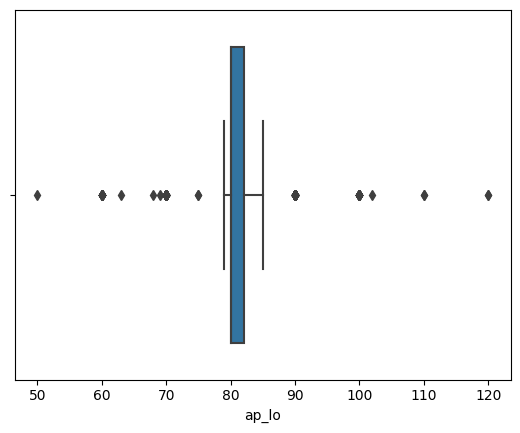

In [21]:
sns.boxplot(x="ap_lo", data=df);

In [22]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,53.367803,1.367556,164.819302,74.083573,126.523614,80.675565,1.334702,1.186858,0.078029,0.047228,0.763860,0.484600
std,6.703213,0.482635,8.030561,14.369241,16.774557,9.297190,0.648587,0.532862,0.268493,0.212344,0.425146,0.500277
min,39.230000,1.000000,144.000000,43.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.815000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.900000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.505000,2.000000,170.000000,80.000000,140.000000,82.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.850000,2.000000,198.000000,160.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [23]:
df.ap_hi.mean()

126.52361396303901

⭐What is the std dev. for Systolic blood pressure?

In [24]:
df.ap_hi.std()

16.774556867643714

⭐What is the standard error of the mean for Systolic blood pressure?

In [25]:
df.ap_hi.sem()

0.7601277290615849

In [26]:
df.ap_hi.std()/np.sqrt(df.shape[0])

0.7601277290615849

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [27]:
df.ap_hi.describe()

count    487.000000
mean     126.523614
std       16.774557
min       90.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      180.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [28]:
#95% Confidence Interval
stats.t.interval(0.95, len(df.ap_hi)-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.03007154206506, 128.01715638401296)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [ ]:
# Ho: mu=122
# Ha: mu!=122

In [29]:
oneSamp = stats.ttest_1samp(df.ap_hi, 122)
oneSamp

TtestResult(statistic=5.951123462662829, pvalue=5.102424202695027e-09, df=486)

In [30]:
# Compare p-value and alpha
alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [31]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,308.0,125.655844,17.212177,90.0,120.0,120.0,130.0,180.0
2,179.0,128.016760,15.930141,90.0,120.0,120.0,140.0,180.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [32]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.010, p=0.922
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [33]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-1.4994217935539171, pvalue=0.13441486755393456)

In [34]:
#Fail to reject Ho. The two population means are equal

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

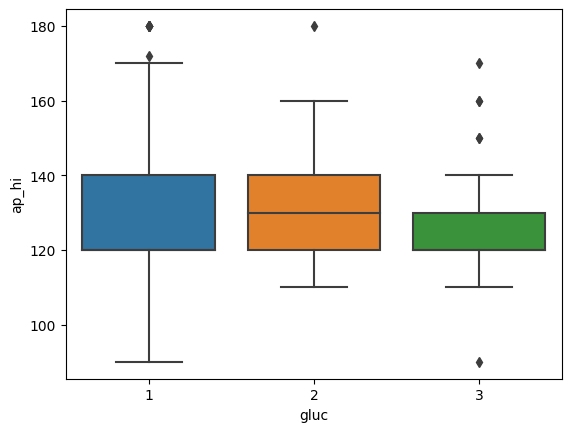

In [35]:
sns.boxplot(x="gluc", y="ap_hi",  data=df);

In [36]:
# Ho: All means are, equal.
# H1: At least one of the means are different.

⭐Show the descriptive statistics of 3 groups.

In [37]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,428.0,126.161215,16.780151,90.0,120.0,120.0,140.0,180.0
2,27.0,131.481481,16.802862,110.0,120.0,130.0,140.0,180.0
3,32.0,127.187500,16.506963,90.0,120.0,120.0,130.0,170.0


⭐Conduct the relavant statistical test to see if there is a significant difference betweenthe groups.

In [38]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=1.3058771053945943, pvalue=0.2718876494820147)

In [ ]:
# Large p value suggests us fail to reject Ho. All means are, equal.

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# compare the height between each diet, using 95% confidence interval 
mc = MultiComparison(df['ap_hi'], df['gluc'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique gluc groups: {}'.format(mc.groupsunique))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   5.3203 0.2469     -2.5 13.1405  False
     1      3   1.0263 0.9404  -6.1965   8.249  False
     2      3   -4.294 0.5897 -14.5928  6.0049  False
-----------------------------------------------------
Unique gluc groups: [1 2 3]


In [40]:
# Fail to reject Ho. Means are same.

## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [41]:
# Ho: The two categorical variables are independent.
# H1: The two categorical variables are dependent.

In [42]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,55,60
1,196,176


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [43]:
chi, p, dof, expctd = stats.chi2_contingency(ct)
print("statistic:", chi)
print("p value:", p)

statistic: 0.6481631282454909
p value: 0.4207701756263591


In [44]:
print('stat=%.3f, p=%.4f' % (chi, p))
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. The two categorical variables are dependent')

stat=0.648, p=0.4208
Fail to reject Ho


⭐Conduct chi-square test to see if there is a relationship between Cholesterol and cardio

In [45]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,209,163
2,32,35
3,10,38


In [46]:
chi, p, dof, expctd = stats.chi2_contingency(ct)
print("statistic:", chi)
print("p value:", p)

statistic: 21.714421681875088
p value: 1.9265187621758576e-05


In [47]:
print('stat=%.3f, p=%.4f' % (chi, p))
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. The two categorical variables are dependent')

stat=21.714, p=0.0000
We reject the null hypothesis. The two categorical variables are dependent
